  
         Potential : V(x) = (L*(L+1))/(x*x)-2./x    (Hydrogen L=0)   
  
 E_in = -1.6000  dE =  0.005  h =  0.01  dim =  6000
  
  ****************   Eigenvalue  # 1   ***************** 
 imatch =  126  xmatch = 1.261  V(xmatch) = -1.58604  E = -1.5950
 imatch =  136  xmatch = 1.361  V(xmatch) = -1.46951  E = -1.4750
 imatch =  148  xmatch = 1.481  V(xmatch) = -1.35044  E = -1.3550
 imatch =  162  xmatch = 1.621  V(xmatch) = -1.23381  E = -1.2350
 imatch =  180  xmatch = 1.801  V(xmatch) = -1.11049  E = -1.1150
 imatch =  201  xmatch = 2.011  V(xmatch) = -0.99453  E = -0.9950
 k =  5   E_old = -1.115    Eingen = -0.995   f_old = 1.052e+25   f = -3.124e+21   delta_E = -3.560e-05

  ****************   Eigenvalue  # 2   ***************** 
 imatch =  548  xmatch = 5.481  V(xmatch) = -0.36490  E = -0.3650
 imatch =  817  xmatch = 8.171  V(xmatch) = -0.24477  E = -0.2450
 k =  1   E_old = -0.365    Eingen = -0.245   f_old = 5.129e+12   f = -4.319e+08   delta_E = -1.011e-05

  ************

C:\Users\OUM\AppData\Local\Temp\ipykernel_2772\3298351469.py:17: RuntimeWarning: invalid value encountered in divide
  Vx = (L * (L + 1)) / (x * x) - 2. / x  # effective potential
C:\Users\OUM\AppData\Local\Temp\ipykernel_2772\3298351469.py:17: RuntimeWarning: divide by zero encountered in divide
  Vx = (L * (L + 1)) / (x * x) - 2. / x  # effective potential


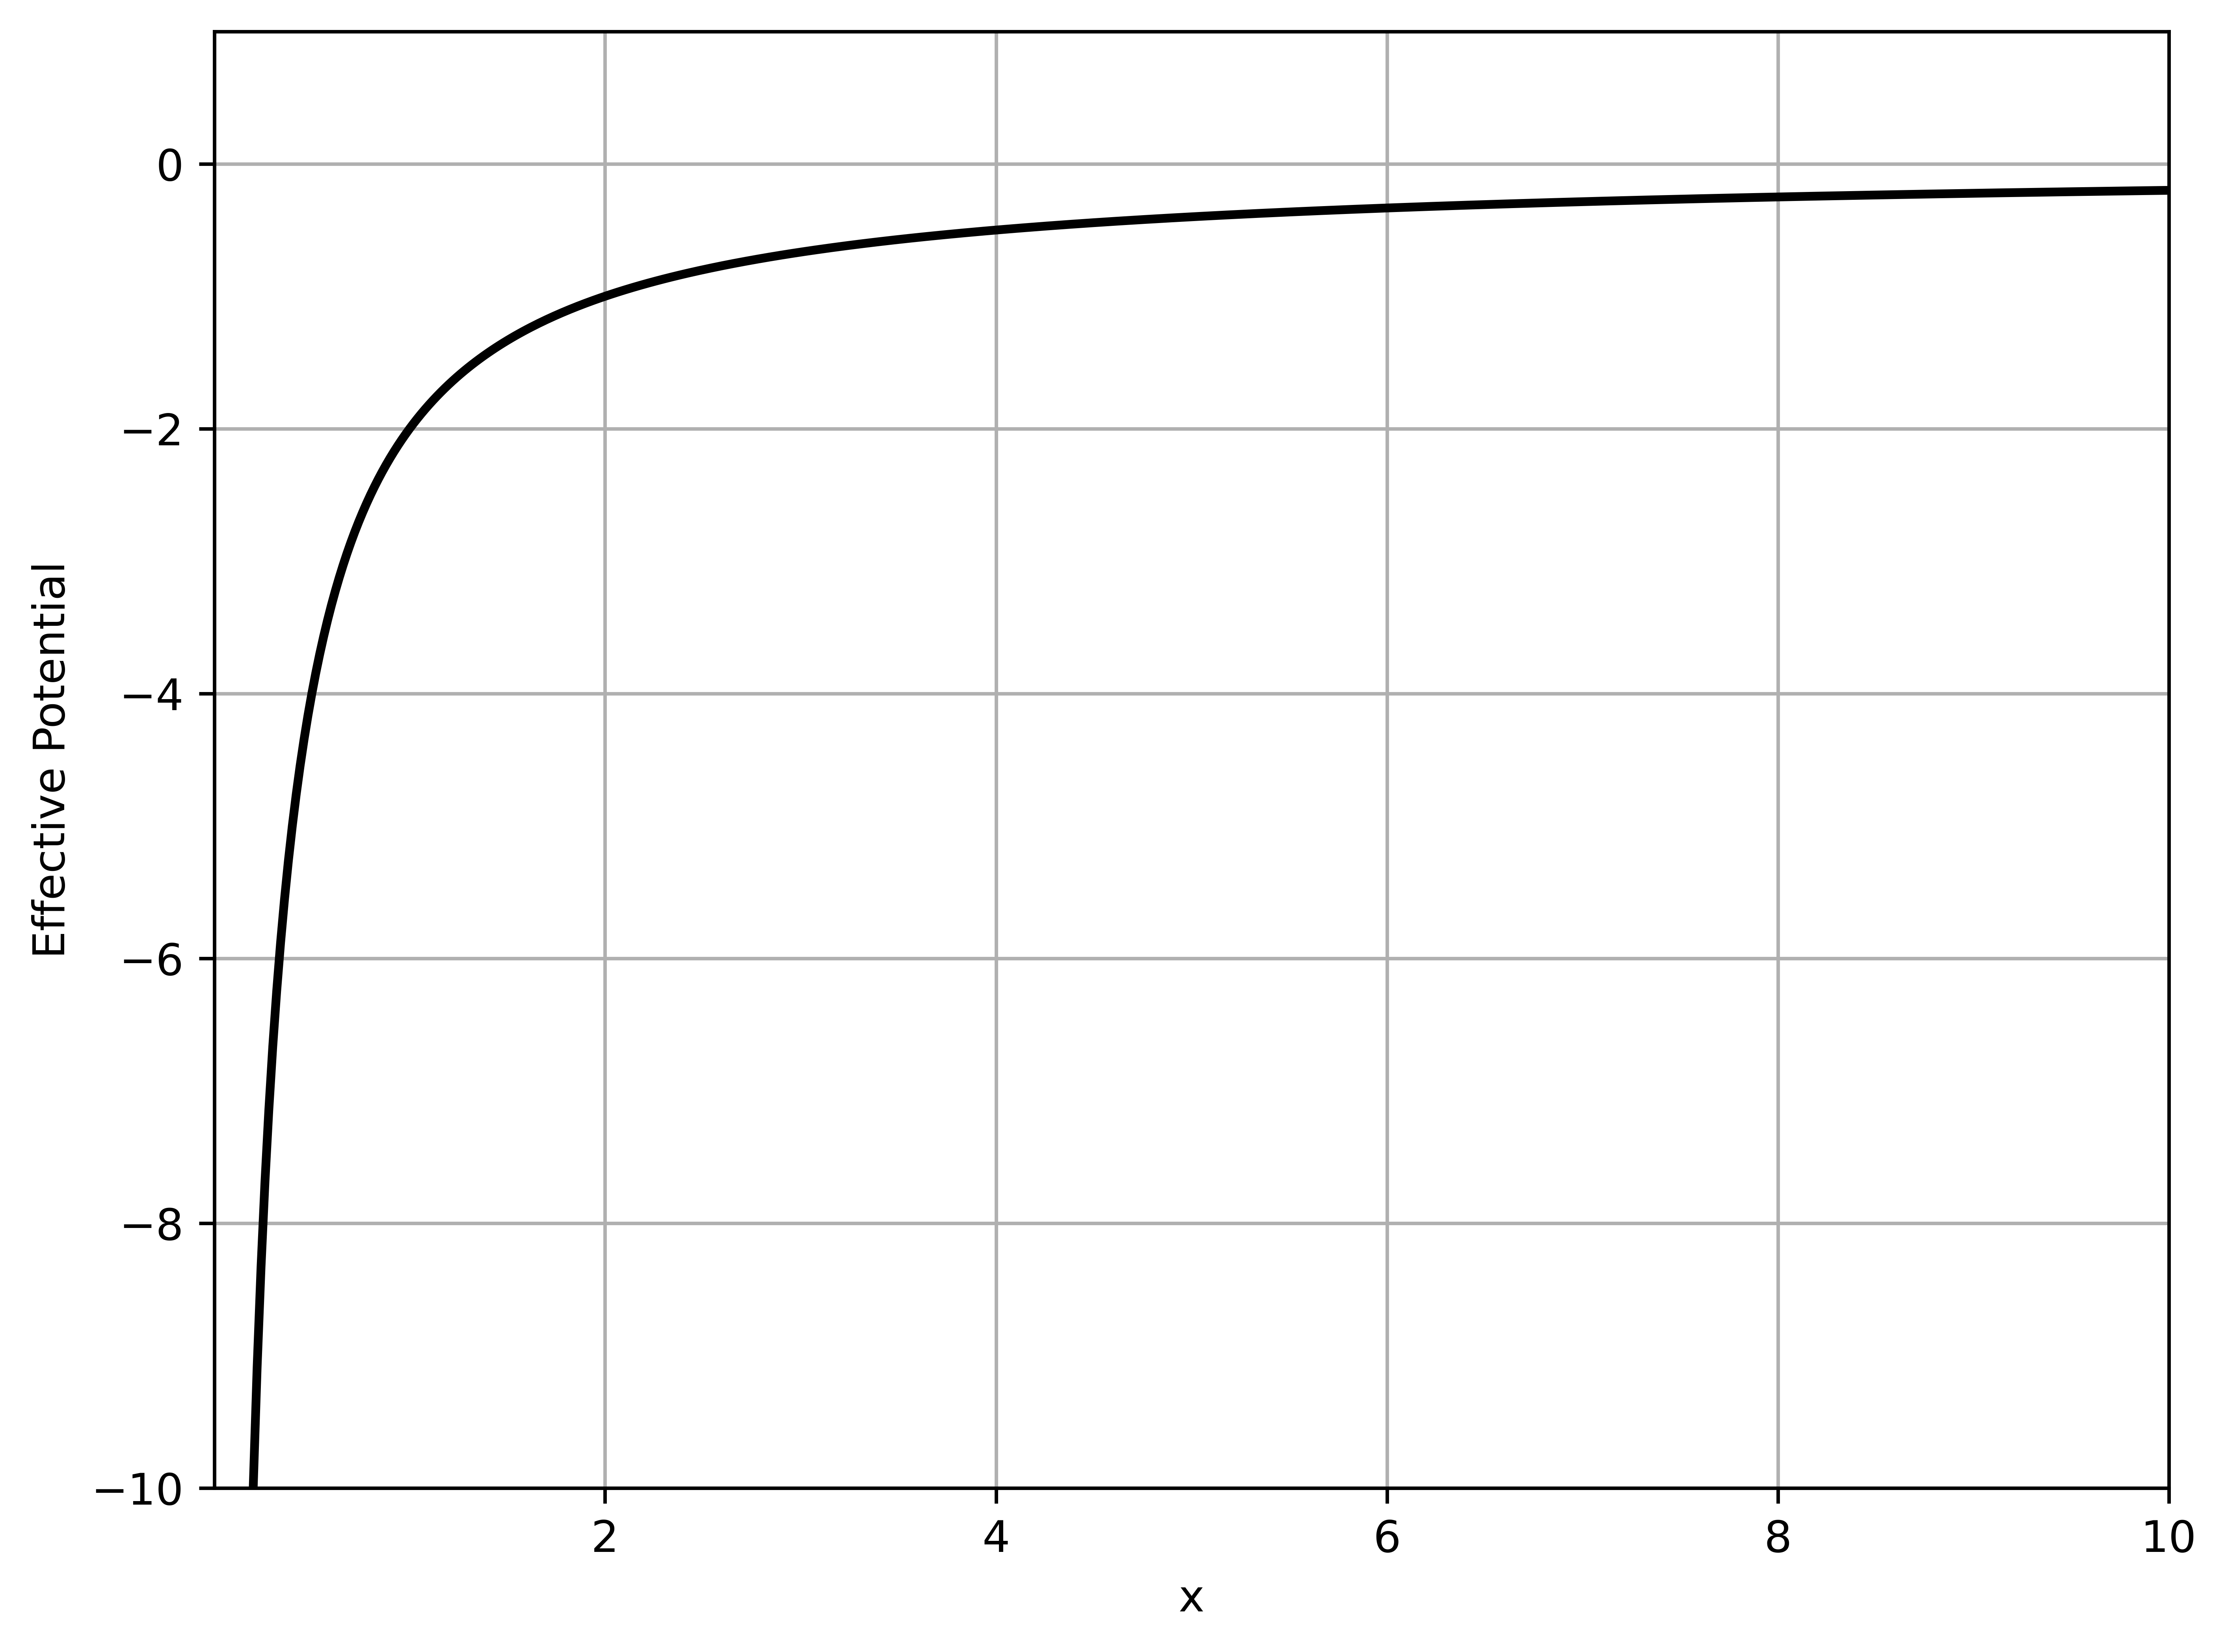

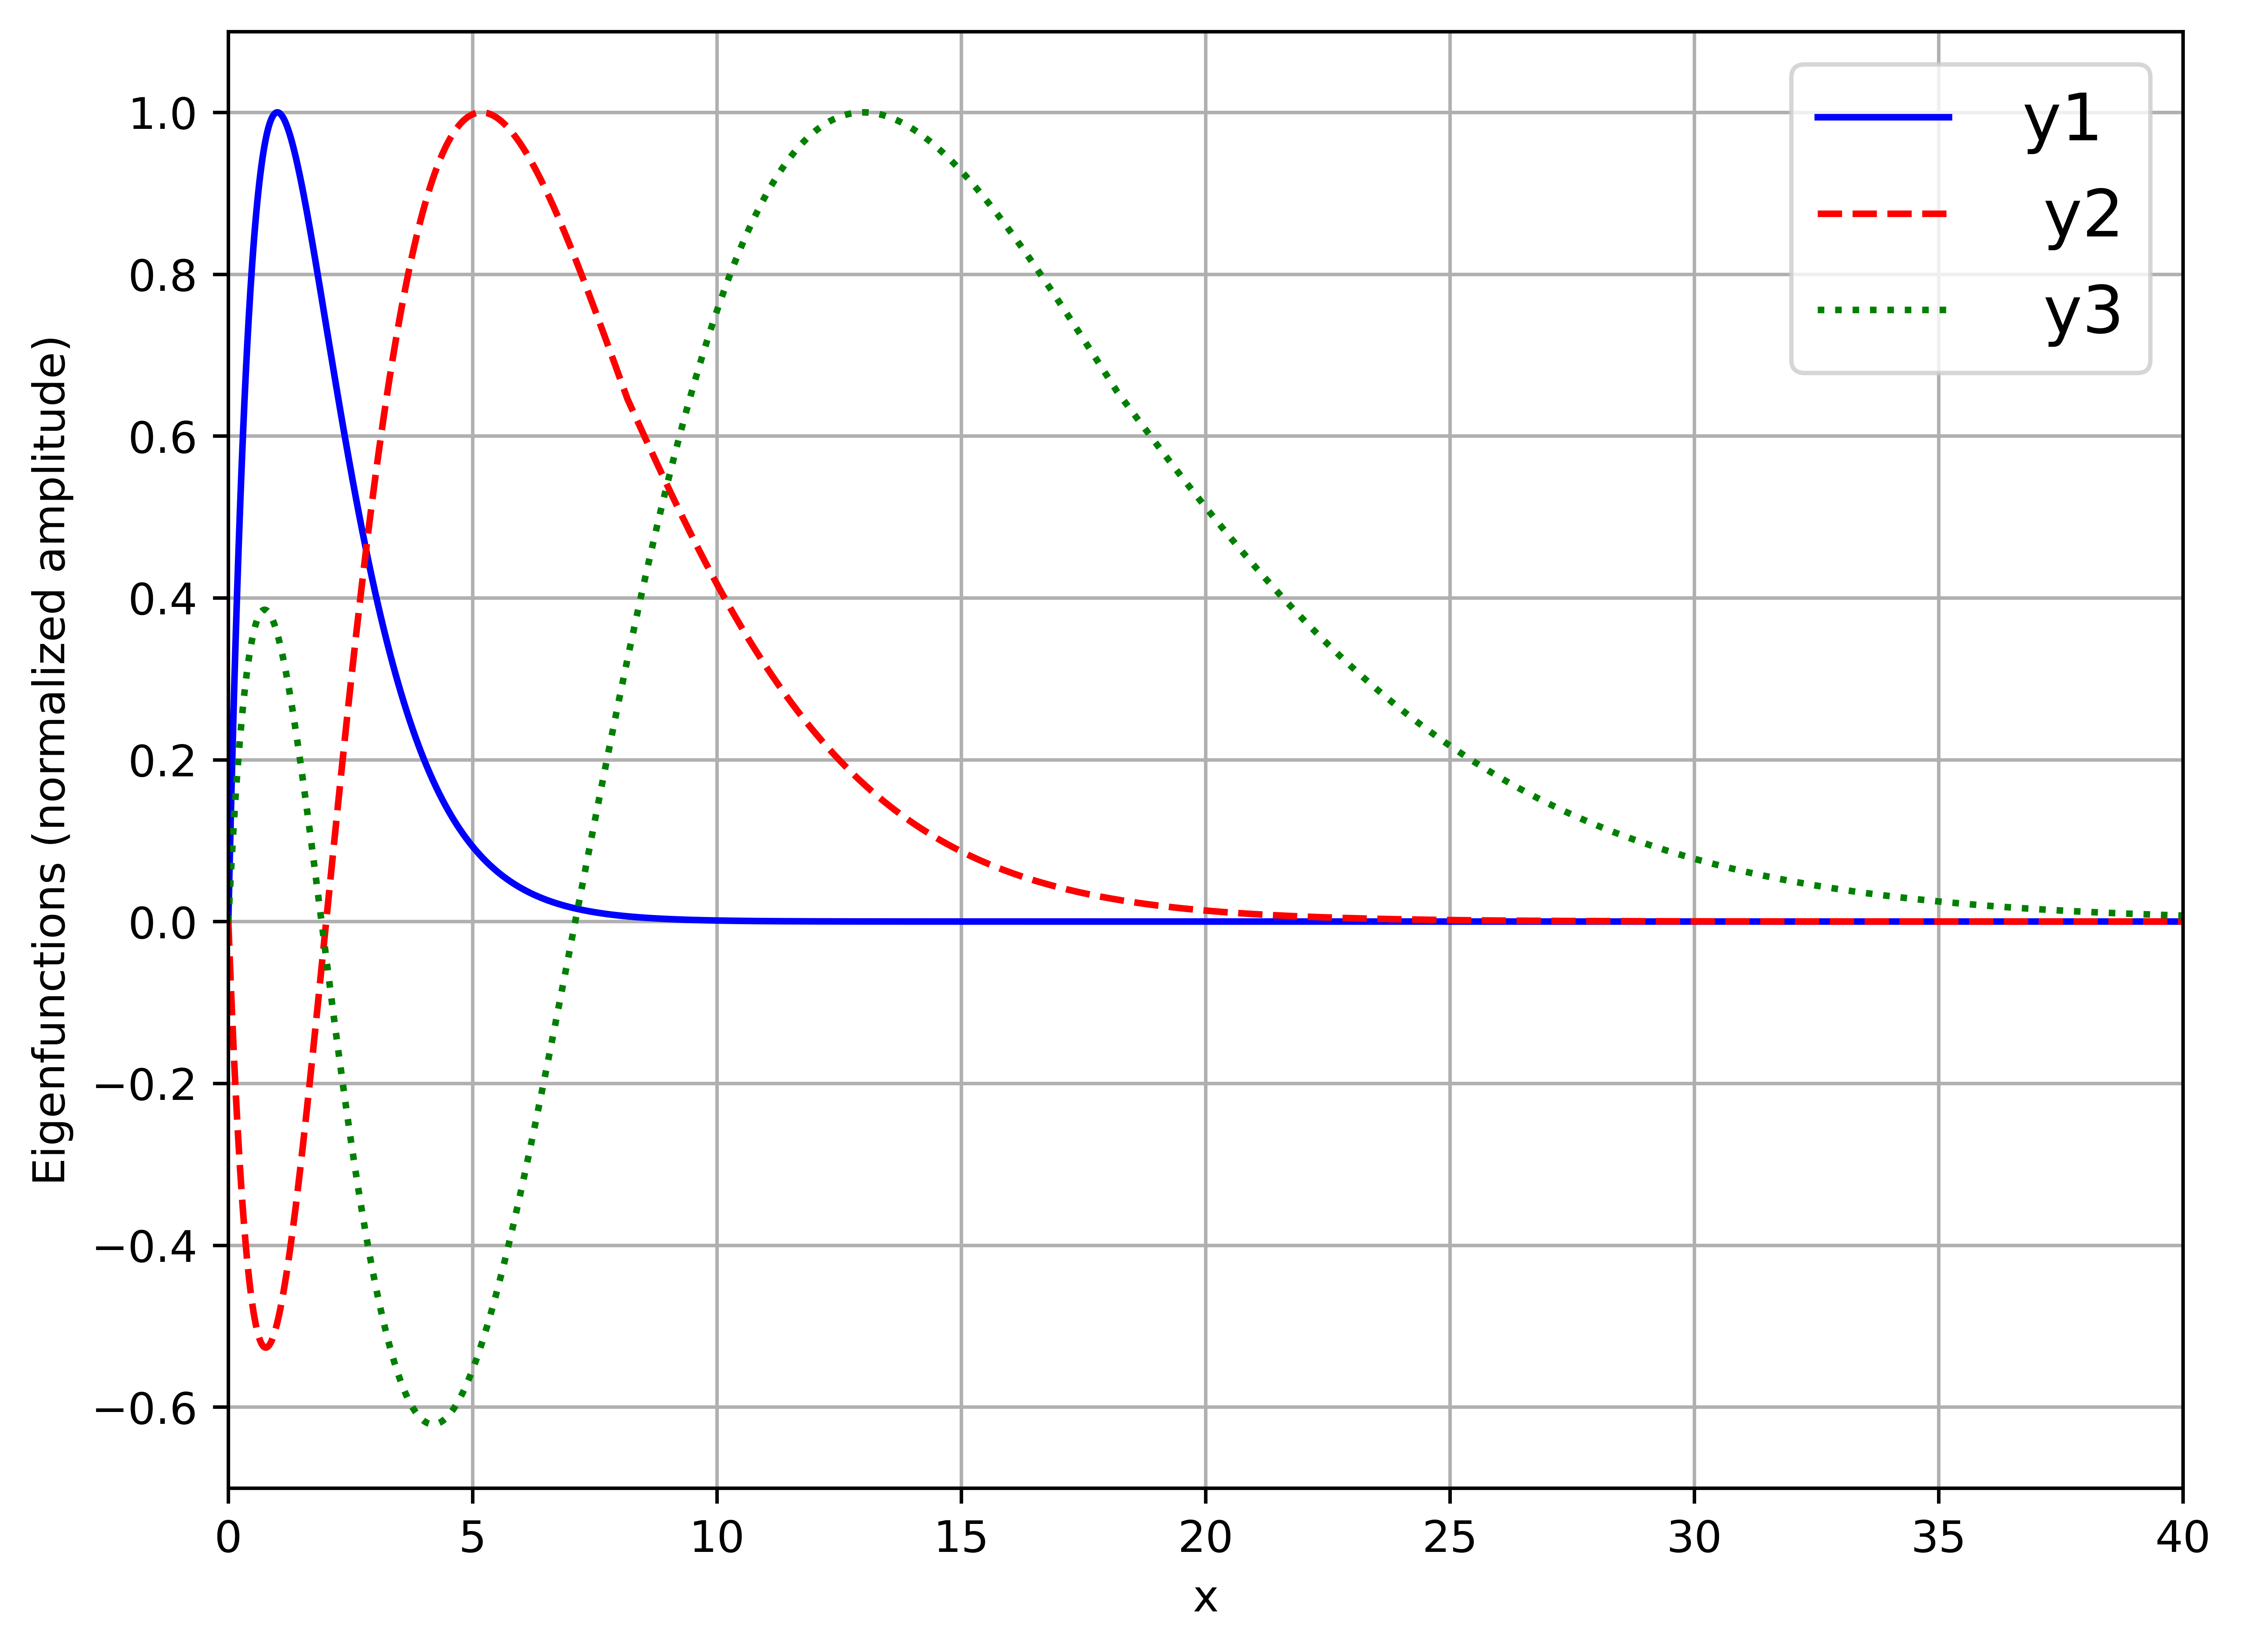

  
  probability normalization 
 efic1 = 0.031   I1 = 1.884   eI1 = 0.105
 efic2 = 0.078   I2 = 4.674   eI2 = 0.161
 efic2 = 0.162   I2 = 9.708   eI2 = 0.221
  
  checking probability 
 efic1 = 0.031   I1 = 0.981   eI1 = 0.055
 efic2 = 0.084   I2 = 1.081   eI2 = 0.036
 efic3 = 0.161   I3 = 0.998   eI3 = 0.023
 
  energy spectrum (E/Ry)   ['-0.995', '-0.245', '-0.110']
  uncertainty in energy (E/Ry)  [' 0.005', ' 0.005', ' 0.005']
  theoretical spectrum (E/Ry)      ['-1.000', '-0.250', '-0.111']



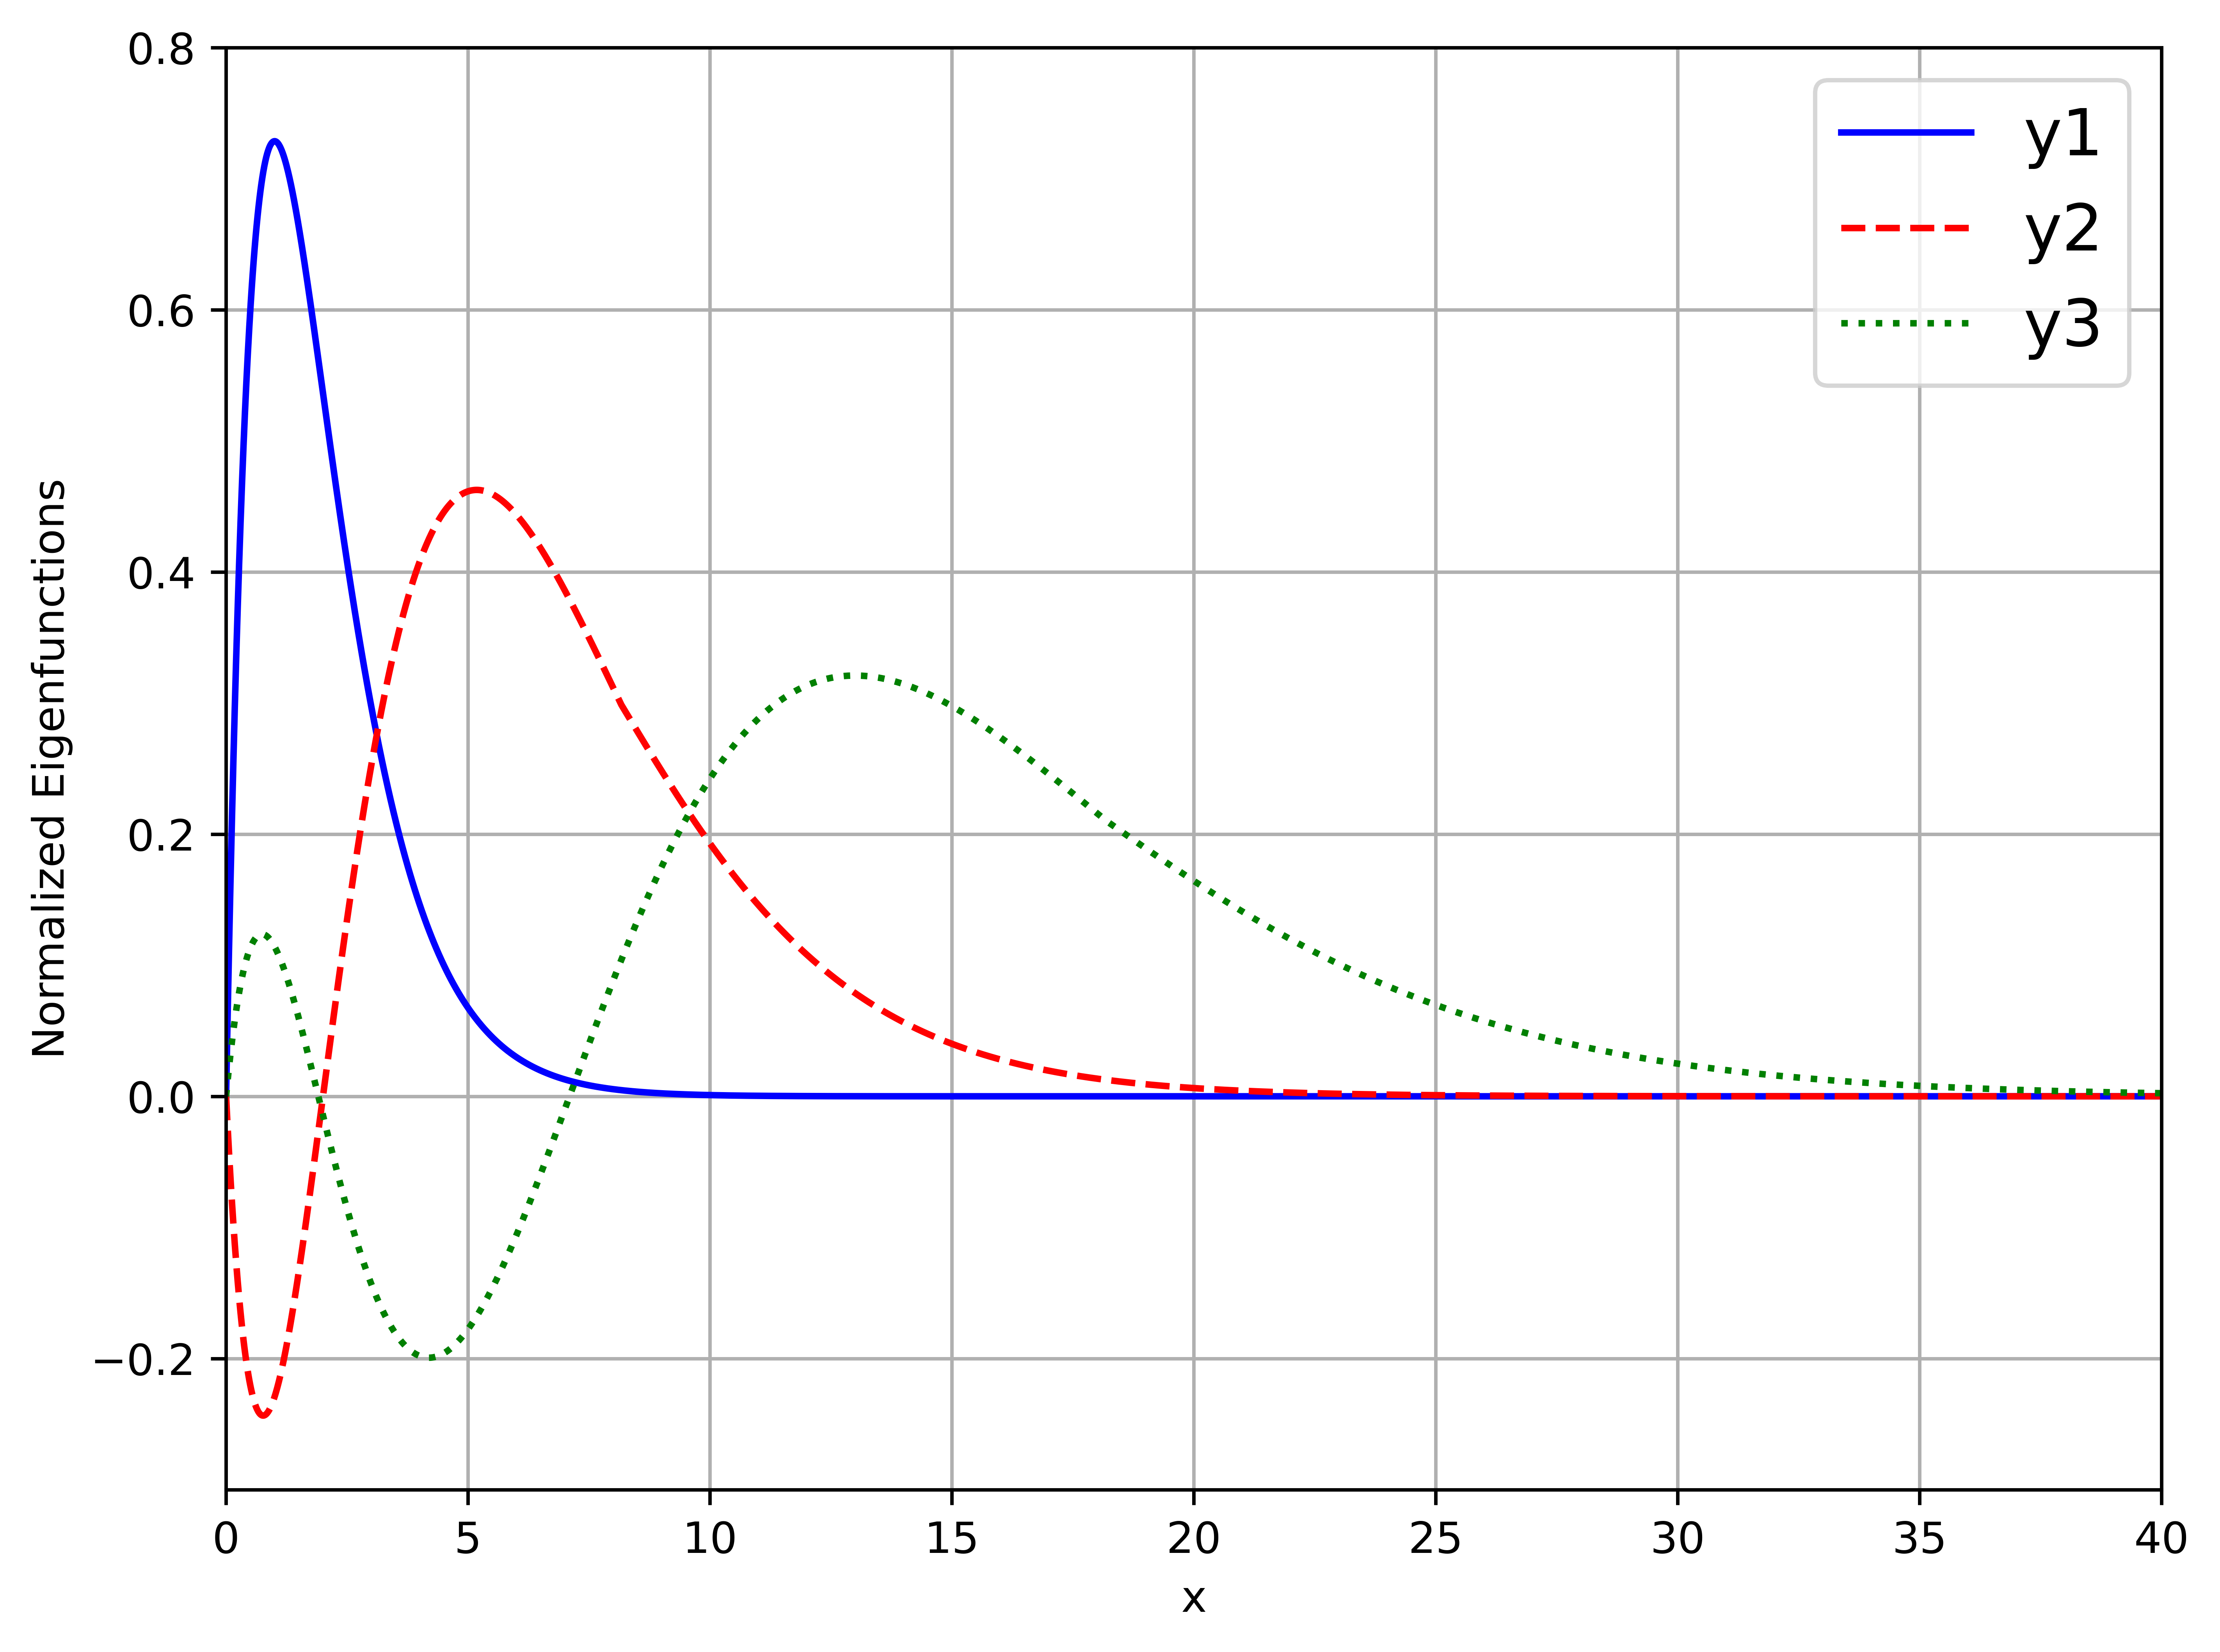

 
  energy spectrum (eV)   ['-13.538', '-3.333', '-1.497']
  uncertainty in energy (eV)  [' 0.068', ' 0.068', ' 0.068']
  espectro teorico (eV)      ['-13.606', '-3.401', '-1.512']

  
   a = -2.016  ea = 0.025    b = -0.005  eb = 0.005       r = 0.999991204      y = ax + b (y = log|En|, x=log(n))
   alfa = -2.016  e_alfa = 0.025     beta = -0.995  e_beta = 0.005    En (calc) = -0.995*n**(-2.016)  En (teor) = -1*n**(-2)  


<Figure size 640x480 with 0 Axes>

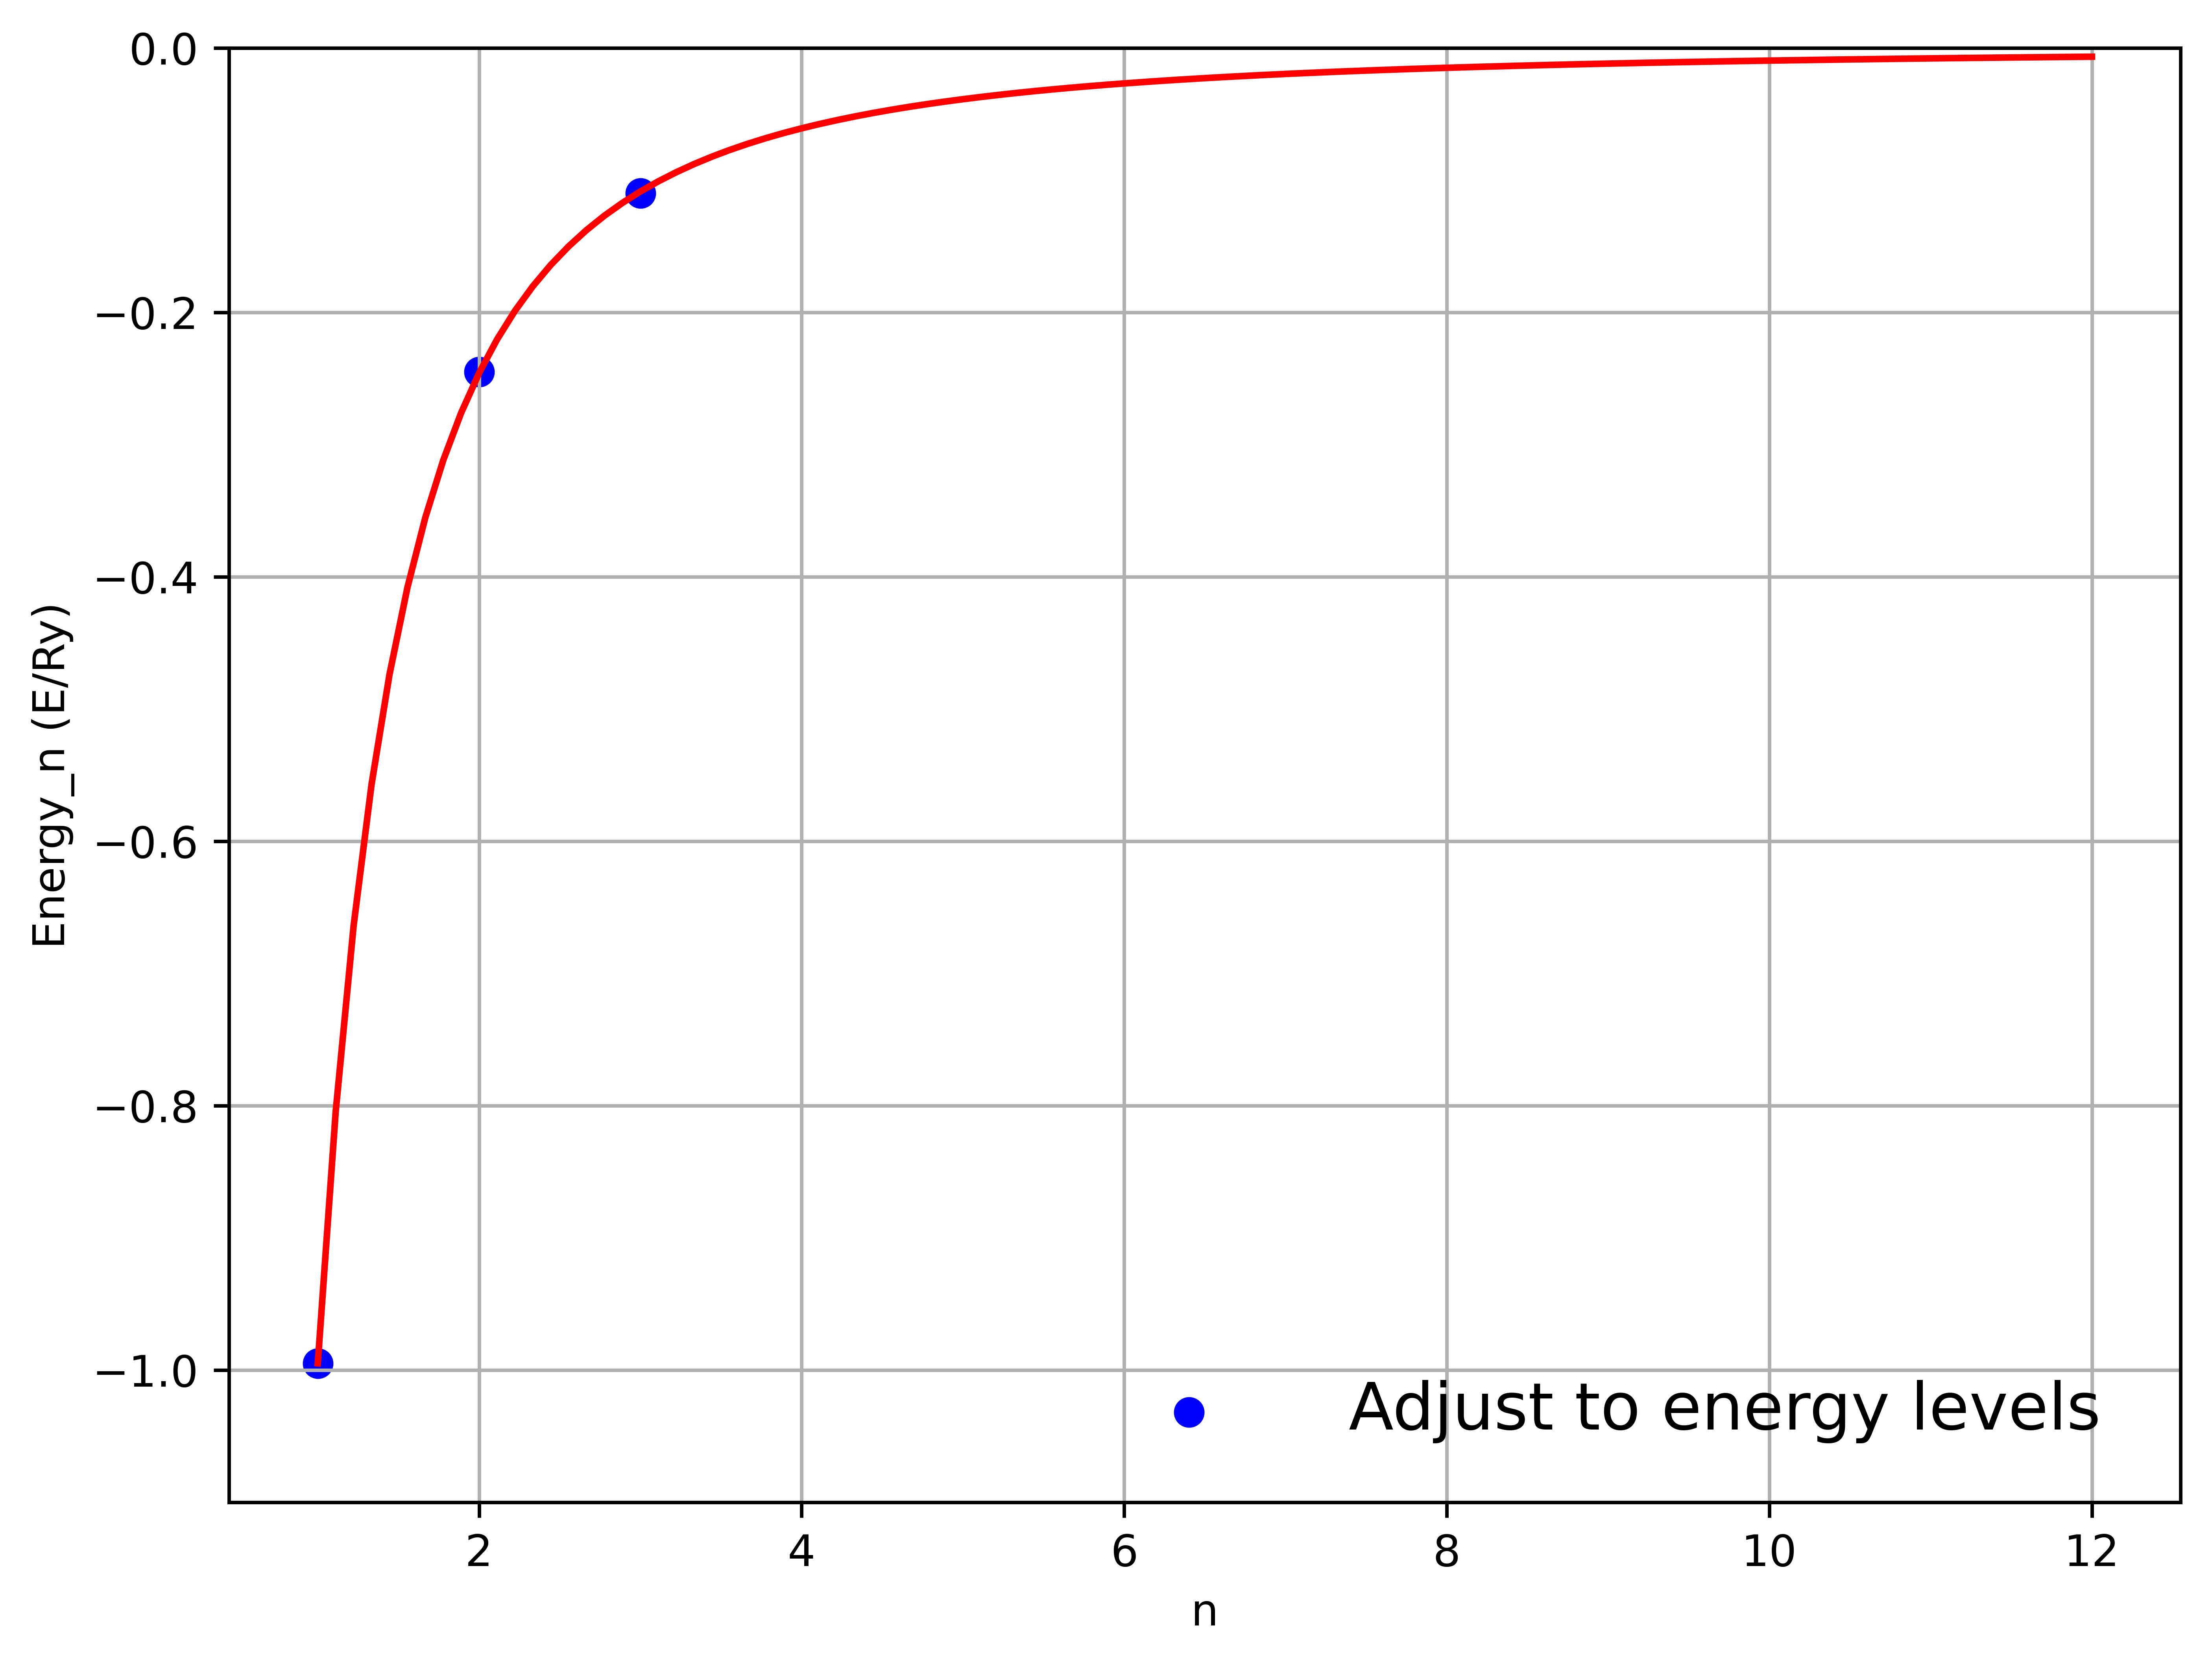


  theoretical spectrum   (E/Ry): ['-1.000', '-0.250', '-0.111', '-0.062', '-0.040', '-0.028', '-0.020', '-0.016']
  predicted spectrum  (E/Ry): ['-0.995', '-0.246', '-0.109', '-0.061', '-0.039', '-0.027', '-0.020', '-0.015']
 predicted uncertainty (eE/Ry): [' 0.005', ' 0.005', ' 0.005', ' 0.005', ' 0.005', ' 0.005', ' 0.005', ' 0.005']


In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from random import random

x = np.linspace(-10, 10, 1001)


def V(x):
    L = 0  # secondary quantum number
    Vx = (L * (L + 1)) / (x * x) - 2. / x  # effective potential
    return Vx


def vec_max(dim, x):  # left maximum
    xmax = 0
    N = dim
    for j in range(int(N)):
        if j < int(N) and abs(x[j]) > xmax:
            xmax = abs(x[j])
        else:
            continue
    return xmax


def nrovl(y0, y1, x0, E, h, iflag):  # left solution
    q0 = (E - V(x0))
    q1 = (E - V(x0 + h))
    q2 = (E - V(x0 + h + h))
    p0 = (1 + h * h * q0 / 12)
    p1 = 2 * (1 - 5 * h * h * q1 / 12)
    p2 = 1 + h * h * q2 / 12
    y2 = (p1 * y1 - p0 * y0) / p2
    if iflag < 1:
        print(" x0 = ", x0, " y0 = ", y0, " V = ", V(x0))
        print(" x1 = ", x0 + h, " y1 = ", y1, " V = ", V(x0 + h), " y2 = ", y2)
    return y2


def nrovr(y0, y1, x0, E, h, iflag):  # right solution
    q0 = (E - V(x0))
    q1 = (E - V(x0 - h))
    q2 = (E - V(x0 - h - h))
    p0 = (1 + h * h * q0 / 12)
    p1 = 2 * (1 - 5 * h * h * q1 / 12)
    p2 = 1 + h * h * q2 / 12
    y2 = (p1 * y1 - p0 * y0) / p2
    if iflag < 1:
        print(" x_100 = ", x0, " y0_100 = ", y0, " V = ", V(x0))
        print(" x_99 = ", x0 - h, " y_99 = ", y1, " V = ", V(x0 - h), " y_98 = ", y2)
    return y2


def espectro(xl, xu, h, delta, eps, dim, nmax, kmax, Ein, Vmax, dE, iflag):
    global f, delta_E
    xx = list(range(dim))
    yy = list(range(dim))
    yl = list(range(dim))
    yr = list(range(dim))
    ee = list(range(nmax))
    ff = list(range(nmax))
    ff2 = list(range(nmax))
    yy1 = list(range(dim))
    yy2 = list(range(dim))
    yy3 = list(range(dim))
    nk = list(range(nmax))
    E_old = Ein
    E = Ein + dE

    # here yy1, yy2 and yy3 represent the three wave functions that the
    # code wants to find, if you want to find more solutions you must add
    # new parameters in the code

    for M in range(nmax):
        print("  ****************   Eigenvalue  #", M + 1, "  ***************** ")

        f_old = 0
        for k in range(kmax):  # iteration for candidate eigenvalue

            imatch = 0

            for j in range(dim - 1):  # classical right turning point
                xx[0] = xl
                xx[dim - 1] = xu
                DE1 = E - V(xx[j])
                xx[j + 1] = xx[j] + h
                DE2 = E - V(xx[j + 1])
                D1D2 = DE1 * DE2
                if D1D2 <= 0 and DE1 > 0:  # match point
                    imatch = j + 1
                    print(" imatch = ", imatch, " xmatch = %2.3f" % (xx[imatch]),
                          " V(xmatch) = %2.5f" % (V(xx[imatch])), " E = %2.4f" % (E))

            xmatch = xx[imatch]
            ii = range(imatch + 2)
            i_lim = ii[2:imatch + 2]

            xx[0] = xl
            xx[1] = xl + h  # initial values
            yy[0] = 0
            yy[1] = delta

            for i in i_lim:  # numerov left solution
                yy[i] = nrovl(yy[i - 2], yy[i - 1], xx[i - 2], E, h, iflag)
                xx[i] = xx[i - 1] + h

            jjj = list(range(dim + 1))
            j_lim = list(jjj[imatch - 1:dim + 1])
            comp_j = len(j_lim)
            jj = sorted(j_lim, key=abs, reverse=True)

            for i in range(dim):
                if i <= imatch + 1:
                    yl[i] = yy[i]
                if i > imatch + 1:
                    yl[i] = 0

            for i in jj:  # numerov right solution
                if i == dim:
                    yr[dim - 1] = 0
                if i == (dim - 2):
                    yr[dim - 2] = 2 * delta
                if i < (dim - 2):
                    yr[i] = nrovr(yr[i + 2], yr[i + 1], xx[i + 2], E, h, iflag)
                    xx[i] = xx[i + 1] - h

            for i in range(imatch - 1):
                yr[i] = 0

            ymatch = yy[imatch]
            yrmatch = yr[imatch]
            ylmatch = yl[imatch]

            if ymatch != 0:
                scale = yrmatch / ymatch
            else:
                continue

            for t in range(imatch + 1):  # y_left
                yy[t] = yy[t] * scale
                yl[t] = -yl[t] * scale
            yl[imatch + 1] = -yl[imatch + 1] * scale

            ymatch = yy[imatch]
            dlmatch = yy[imatch + 1] * scale - yy[imatch - 1]  # dif1_left

            t_lim = list(range(dim + 1))
            tt = list(t_lim[imatch + 1:dim])

            drmatch = yr[imatch + 1] - yr[imatch - 1]  # dif1_right

            f = (dlmatch - drmatch) / (2 * h)

            for t in tt:  # y_right
                yy[t] = yr[t]

            delta_E = -f * (E - E_old) / (f - f_old)

            if abs(delta_E) < eps:  # determination of the root (energy) of f(E) by the secant method
                ee[M] = E
                nk[M] = k
                ff[M] = f
                k = kmax
                break
            else:
                f_old = f
                E_old = E
                E = E + 24 * dE

        if M == 0:
            E = E + 126 * dE
            for j in range(dim):
                yy1[j] = yy[j]
        if M == 1:
            E = E + 3 * dE
            for j in range(dim):
                yy2[j] = yy[j]
        if M == 2:
            E = E_old + 6 * dE
            for j in range(dim):
                yy3[j] = yy[j]

        print(" k = %2d   E_old = %2.3f    Eingen = %2.3f   f_old = %2.3e   f = %2.3e   delta_E = %2.3e" % (
            nk[M], E_old, ee[M], f_old, f, delta_E))
        print()

    return ee, xx, yy1, yy2, yy3


# ==========================================================================

a = 0.001
b = 60.001
h = 0.01
xl = a
xu = b
D = xu - xl
delta = 0.02
eps = 0.0001
dim = int(D / h)
kmax = 300
nmax = 3
n = 0
iflag = 0
Rydberg = 13.605693122994

x0 = xl
y0 = 0.
y1 = delta
iflag = 1
nrovl(y0, y1, x0, 0, h, iflag)
nrovr(y0, y1, xu, 0, h, iflag)

dE = delta / 4
Ein = -1.6
Vmax = 0.

print(" ==========================================================================")
print("  ")
print("         Potential : V(x) = (L*(L+1))/(x*x)-2./x    (Hydrogen L=0)   ")
print("  ")
print(" ==========================================================================")

print(" E_in = %2.4f" % (Ein), " dE = ", dE, " h = ", h, " dim = ", dim)
print("  ")

ee, xx, yy1, yy2, yy3 = espectro(xl, xu, h, delta, eps, dim, nmax, kmax, Ein, Vmax, dE, iflag)

A = 1.  # amplitude normalization in 1 unit
ymax1 = vec_max(dim, yy1)
ymax2 = vec_max(dim, yy2)
ymax3 = vec_max(dim, yy3)

for i in range(dim):  # amplitude normalization
    yy1[i] = yy1[i] / ymax1
    yy2[i] = yy2[i] / ymax2
    yy3[i] = yy3[i] / ymax3

colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']  # color list (blue, red, green, cyan, yellow, magenta and black)

plt.figure(figsize=(8, 6), dpi=800)
plt.plot(x, V(x), color=colors[6], linewidth=2)
plt.ylim(-10, 1)
plt.xlim(a, 10)
plt.xlabel('x')
plt.ylabel('Effective Potential')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=800)
plt.plot(xx, yy1, color=colors[0])
plt.plot(xx, yy2, '--', color=colors[1])
plt.plot(xx, yy3, ':', color=colors[2])
plt.legend([' y1', '  y2', '  y3'], prop={"size": 15}, frameon=True)
plt.ylim(-0.7, 1.1)
plt.xlim(0, 40)
plt.xlabel('x')
plt.ylabel('Eigenfunctions (normalized amplitude)')
plt.grid()
plt.show()

efic = list(range(nmax))
I = list(range(nmax))
eI = list(range(nmax))

S = A * (xu - xl)  # Born normalizatiom
l0 = 0
l1 = 0
l2 = 0
N = 10000
for i in range(N):  # integral of y*y with the Monte Carlo method
    y = A * random()
    j = np.random.randint(dim)
    yj1 = yy1[j] * yy1[j]
    yj2 = yy2[j] * yy2[j]
    yj3 = yy3[j] * yy3[j]
    if y <= yj1:
        l0 += 1
    if y <= yj2:
        l1 += 1
    if y <= yj3:
        l2 += 1

efic[0] = float(l0) / N
efic[1] = float(l1) / N
efic[2] = float(l2) / N
I[0] = S * efic[0]
I[1] = S * efic[1]
I[2] = S * efic[2]
eI[0] = (S / np.sqrt(N)) * np.sqrt(efic[0] * (1 - efic[0]))
eI[1] = (S / np.sqrt(N)) * np.sqrt(efic[1] * (1 - efic[1]))
eI[2] = (S / np.sqrt(N)) * np.sqrt(efic[2] * (1 - efic[2]))

print("  ")
print("  probability normalization ")
print(" efic1 = %2.3f   I1 = %2.3f   eI1 = %2.3f" % (efic[0], I[0], eI[0]))
print(" efic2 = %2.3f   I2 = %2.3f   eI2 = %2.3f" % (efic[1], I[1], eI[1]))
print(" efic2 = %2.3f   I2 = %2.3f   eI2 = %2.3f" % (efic[2], I[2], eI[2]))

for i in range(dim):  # probability normalization
    yy1[i] = yy1[i] / np.sqrt(I[0])
    yy2[i] = yy2[i] / np.sqrt(I[1])
    yy3[i] = yy3[i] / np.sqrt(I[2])

ymax1 = vec_max(dim, yy1)
ymax2 = vec_max(dim, yy2)
ymax3 = vec_max(dim, yy3)

S0 = ymax1 * ymax1 * (xu - xl)
S1 = ymax2 * ymax2 * (xu - xl)
S2 = ymax3 * ymax3 * (xu - xl)

l0 = 0
l1 = 0
l2 = 0  # checking probability
N = 10000
for i in range(N):
    y1 = ymax1 * ymax1 * random()
    y2 = ymax2 * ymax2 * random()
    y3 = ymax3 * ymax3 * random()
    j = np.random.randint(dim)
    yj1 = yy1[j] * yy1[j]
    yj2 = yy2[j] * yy2[j]
    yj3 = yy3[j] * yy3[j]
    if y1 <= yj1:
        l0 += 1
    if y2 <= yj2:
        l1 += 1
    if y3 <= yj3:
        l2 += 1

efic[0] = float(l0) / N
efic[1] = float(l1) / N
efic[2] = float(l2) / N
I[0] = S0 * efic[0]
I[1] = S1 * efic[1]
I[2] = S2 * efic[2]
eI[0] = (S0 / np.sqrt(N)) * np.sqrt(efic[0] * (1 - efic[0]))
eI[1] = (S1 / np.sqrt(N)) * np.sqrt(efic[1] * (1 - efic[1]))
eI[2] = (S2 / np.sqrt(N)) * np.sqrt(efic[2] * (1 - efic[2]))

print("  ")
print("  checking probability ")
print(" efic1 = %2.3f   I1 = %2.3f   eI1 = %2.3f" % (efic[0], I[0], eI[0]))
print(" efic2 = %2.3f   I2 = %2.3f   eI2 = %2.3f" % (efic[1], I[1], eI[1]))
print(" efic3 = %2.3f   I3 = %2.3f   eI3 = %2.3f" % (efic[2], I[2], eI[2]))

et = [-1, -1 / 4, -1 / 9]
sig_e = [0.005, 0.005, 0.005]
print(" ")
print("  energy spectrum (E/Ry)  ", ['{:2.3f}'.format(energia) for energia in ee])
print("  uncertainty in energy (E/Ry) ", [' {:2.3f}'.format(sige) for sige in sig_e])
print("  theoretical spectrum (E/Ry)     ", ['{:2.3f}'.format(energia) for energia in et])
print()

plt.figure(figsize=(8, 6), dpi=800)
plt.plot(xx, yy1, color=colors[0])
plt.plot(xx, yy2, '--', color=colors[1])
plt.plot(xx, yy3, ':', color=colors[2])
plt.legend(['y1', 'y2', 'y3'], prop={"size": 15}, frameon=True)
plt.ylim(-0.3, 0.8)
plt.xlim(0, 40)
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunctions')
plt.grid(True)
plt.show()

eev = list(range(nmax))
for j in range(nmax):
    eev[j] = Rydberg * ee[j]

sig_e = [Rydberg * 0.005, Rydberg * 0.005, Rydberg * 0.005]
et = [-Rydberg, -0.25 * Rydberg, -(1. / 9) * Rydberg]

print(" ")
print("  energy spectrum (eV)  ", ['{:2.3f}'.format(energia) for energia in eev])
print("  uncertainty in energy (eV) ", [' {:2.3f}'.format(sige) for sige in sig_e])
print("  espectro teorico (eV)     ", ['{:2.3f}'.format(energia) for energia in et])
print()

se = [0.005, 0.005, 0.005]
nx = [1, 2, 3]
N = len(ee)
x = list(range(N))
y = list(range(N))
ey = list(range(N))

for i in range(N):
    y[i] = np.log(-ee[i])
    x[i] = np.log(nx[i])
    ey[i] = -se[i] / ee[i]

isig2 = [1 / (ey[0] * ey[0]), 1 / (ey[1] * ey[1]), 1 / (ey[2] * ey[2])]

sig2 = 1 / sum(isig2)
w = [sig2 * isig2[0], sig2 * isig2[1], sig2 * isig2[2]]

x_M = [w[0] * x[0], w[1] * x[1], w[2] * x[2]]
y_M = [w[0] * y[0], w[1] * y[1], w[2] * y[2]]
xy_M = [w[0] * x[0] * y[0], w[1] * x[1] * y[1], w[2] * x[2] * y[2]]

xM = sum(x_M)
yM = sum(y_M)
xyM = sum(xy_M)

x2_M = [w[0] * (x[0]) ** 2, w[1] * (x[1]) ** 2, w[2] * (x[2]) ** 2]
x2M = sum(x2_M)
sx_2 = [w[0] * (x[0] - xM) ** 2, w[1] * (x[1] - xM) ** 2, w[2] * (x[2] - xM) ** 2]
sy_2 = [w[0] * (y[0] - yM) ** 2, w[1] * (y[1] - yM) ** 2, w[2] * (y[2] - yM) ** 2]
sx2 = sum(sx_2)
sy2 = sum(sy_2)
sxy = xyM - (xM * yM)

a = sxy / sx2
b = yM - a * xM
r = np.sqrt(sx2 / sy2) * a

alfa = a
beta = -np.exp(b)

siga = np.sqrt(sig2 / sx2)
sigb = siga * np.sqrt(x2M)
e_beta = -sigb * beta

print("  ")
print("   a = %2.3f  ea = %2.3f    b = %2.3f  eb = %2.3f       r = %2.9f" % (a, siga, b, sigb, -r),
      "     y = ax + b (y = log|En|, x=log(n))")
print("   alfa = %2.3f  e_alfa = %2.3f     beta = %2.3f  e_beta = %2.3f" % (alfa, siga, beta, e_beta),
      "   En (calc) = %2.3f*n**(%2.3f)" % (beta, alfa), " En (teor) = -1*n**(-2)  ")

x = np.linspace(1, 12, 100)
xx = list(range(8))
et = list(range(8))
eobs = list(range(8))
sig_e = list(range(8))

for i in range(8):
    et[i] = -1 / (i + 1) ** 2
    eobs[i] = beta * (i + 1) ** alfa
    sig_e[i] = 0.005

plt.figure()
plt.figure(figsize=(8, 6), dpi=800)
plt.scatter(nx, ee, c="blue")
plt.plot(x, beta * x ** alfa, '-', color=colors[1])
plt.xlabel('n')
plt.ylabel('Energy_n (E/Ry)')
plt.ylim(-1.1, 0)
plt.legend(['  Adjust to energy levels '], prop={"size": 15}, frameon=False)
plt.grid(True)
plt.show()

print()
print("  theoretical spectrum   (E/Ry):", ['{:2.3f}'.format(energia) for energia in et])
print("  predicted spectrum  (E/Ry):", ['{:2.3f}'.format(energia) for energia in eobs])
print(" predicted uncertainty (eE/Ry):", [' {:2.3f}'.format(energia) for energia in sig_e])

# In[ ]:


# In[ ]:
